# Concevez une application au service de la santé publique

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Sommaire
[I. Téléchargement et exploration du jeu de données](#I.-Téléchargement-et-exploration-du-jeu-de-données)

# I. Téléchargement et exploration du jeu de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,38,47,52,55,64,134) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835100 entries, 0 to 1835099
Columns: 186 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(62)
memory usage: 2.5+ GB


In [5]:
df.shape

(1835100, 186)

**Une idée d'application pourrait être de fournir des recommandations de sélection de plats et/ou d'aliments permettant de suivre les recommandations du PNNS:**
- Au moins 5 fruits et légumes par jour
- Des féculents à chaque repas selon l’appétit
- 3 produits laitiers (lait, yaourt, fromage) par jour
- 1 à 2 portions de viande, œufs et produits de la pêche par jour
- Limiter les matières grasses ajoutées, le sucre et le sel

**Cette recommandation doit proposer les produits de meilleurs nutriscore et ecoscore dans leurs catégories. Dans un premier temps, on pourra limiter cette recommandation à un combo One-dish meal + yaourt + fruits. Autre possibilité: à partir d'un aliment scanné, proposer de quoi compléter le menu. On va avoir besoin des apports en energie, et lipides/glucides/protides.**

**energie**
- homme 2700kcal
- femme 2200 kcal

**nutriments**
- lipides 35-40%
- protides 15%
- glucides 45-50%**

**Commençons par afficher les colonnes**

In [6]:
for c in df.columns:
    print(c)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
ecoscore_score_fr
ecoscore_grade_fr


**Commençons par sélectionner les colonnes qui sont pertinentes pour notre application.**

**1. categories**

In [7]:
categories = df[['product_name',
        'generic_name',
        'categories',
        'categories_tags',
        'categories_en',
        ]].dropna()

In [8]:
categories.head()

,product_name,generic_name,categories,categories_tags,categories_en
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,"Plats préparés, Produits à la viande, Plats pr...","en:meals,en:meat-based-products,en:meals-with-...","Meals,Meat-based products,Meals with meat,Poul..."
337,Salade Cesar,Laitue en salade,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
351,Danoises à la cannelle roulées,Pâtisserie,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Pastries"
368,Flute,Flute,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
375,Chaussons tressés aux pommes,Pâtisserie,"Snacks, Snacks sucrés, Biscuits et gâteaux, Vi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Viennoi..."


**Parmi les colonnes "categories", la colonne "categories_tags" semble mieux appropriée car formatée. On ne conserve que cette colonne**

In [9]:
categories = categories.drop(columns=['categories', 'categories_en'])

In [12]:
categories.categories_tags.nunique()

29949

**Beaucoup de categories_tags différents. C'est sans doute car chaque tag est un assemblage de plusieurs tags. Idéalement, il faudrait pouvoir les séparer. Mais regardons d'abord les colonnes pnns_groups qui sont également des catégories d'aliments et de plats**

In [13]:
categories = df[['product_name',
                 'generic_name',
                 'categories_tags',
                 'pnns_groups_1',
                 'pnns_groups_2'
                ]].dropna()

In [15]:
categories.shape

(109390, 5)

In [16]:
categories.head()

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",Composite foods,One-dish meals
337,Salade Cesar,Laitue en salade,"en:plant-based-foods-and-beverages,en:plant-ba...",Fruits and vegetables,Vegetables
351,Danoises à la cannelle roulées,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",Sugary snacks,Biscuits and cakes
368,Flute,Flute,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Bread
375,Chaussons tressés aux pommes,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",sugary-snacks,pastries


In [17]:
categories.pnns_groups_2.nunique()

44

**Mieux! Regardons en détail les catégories et pnns_groups_2 pour la première entrée**

In [25]:
categories.iloc[0].categories_tags

'en:meals,en:meat-based-products,en:meals-with-meat,en:poultry-meals,en:microwave-meals,en:turkey-dishes'

**La présence de féculents n'est pas signalée**

**Qu'en est-il des colonnes labels, main_category?**

In [21]:
df[['product_name',
    'generic_name',
    'main_category',
    'main_category_en',
    'labels',
    'labels_tags',
    'labels_en'
   ]].dropna()

,product_name,generic_name,main_category,main_category_en,labels,labels_tags,labels_en
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,en:turkey-dishes,Turkey dishes,"Viande Française, Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:viande-francaise,Made in France"
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,en:pestos,Pestos,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
401,Crème d'Artichaut Bio Kazidomi,Crème d'artichaut,en:artichoke-spreads,Artichoke spreads,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
415,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,en:shortbread-cookies,Shortbread cookies,Point Vert,en:green-dot,Green Dot
426,Bonbons acidulés Raisin Fraise,Bonbons acidulés Raisin Fraise,en:candies,Candies,"Contient des OGMs, Sans arômes artificiels","en:no-artificial-flavors,en:contains-gmos","No artificial flavors,Contains GMOs"
...,...,...,...,...,...,...,...
1834592,SAUMON EDEN,INTER AGRO,en:seafood,Seafood,Jamais congelé,en:never-frozen,Never frozen
1834697,Roussette du Bugey (2011),Vins blanc du Bugey,fr:bugey,fr:Bugey,AOC,fr:aoc,fr:AOC
1834731,Thé vert Earl grey,thé bio équitable,en:herbal-teas,Herbal teas,"Organic, EU Organic, Fair trade, Max Havelaar,...","en:organic,en:eu-organic,en:fair-trade,en:ab-a...","Organic,EU Organic,Fair trade,AB Agriculture B..."
1834951,Pate feuilletée sans gluten,Pâte Feuilletée avec de la matière grasse végé...,en:puff-pastry-sheets,Puff pastry sheets,Sans gluten,en:gluten-free,Gluten-free


**Dans un premier temps, les colonnes labels et main_category ne vont pas nous être très utiles. On se contentera des colonne categories ou pnns_groups pour catégoriser nos aliments. On ajoute les colonnes salt_100g, fat_100g
saturated-fat_100g et sugars_100g pour pouvoir utiliser ces valeurs dans notre traitement**

In [23]:
df[['product_name',
     'generic_name',
     'categories_tags',
     'pnns_groups_1',
     'pnns_groups_2',
    'salt_100g',
    'fat_100g',
    'saturated-fat_100g',
    'sugars_100g']]

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g
0,jeunes pousses,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN
1,Vitória crackers,NaN,NaN,unknown,unknown,1.40,7.0,3.08,15.0
2,Cacao,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN
3,Filetes de pollo empanado,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN
4,Hamburguesas de ternera 100%,NaN,NaN,unknown,unknown,2.10,15.1,6.10,1.0
...,...,...,...,...,...,...,...,...,...
1835095,Sandwich club Rillette poisson combava,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN
1835096,Thé noir BIO Darjeeling,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN
1835097,Fati,NaN,NaN,unknown,unknown,0.64,0.3,0.00,0.6
1835098,Light & Free SKYR A BOIRE,NaN,NaN,unknown,unknown,0.15,0.2,0.10,7.8


**nutriscore et ecoscore**

In [28]:
df[['product_name',
    'generic_name',
    'categories_tags',
     'pnns_groups_1',
     'pnns_groups_2',
    'salt_100g',
    'fat_100g',
    'saturated-fat_100g',
    'sugars_100g',
    'nutriscore_score',
    'nutriscore_grade',
    'ecoscore_score_fr',
    'ecoscore_grade_fr'
   ]].dropna()

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",Composite foods,One-dish meals,0.700,2.20,0.90,0.500,0.0,b,53.0,c
375,Chaussons tressés aux pommes,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",sugary-snacks,pastries,0.647,10.70,2.00,24.700,9.0,c,60.0,b
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",Fat and sauces,Dressings and sauces,2.700,53.20,9.60,0.500,23.0,e,64.0,b
420,Quiche Lorraine,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",Composite foods,Pizza pies and quiche,0.499,6.79,2.86,0.714,2.0,b,30.0,d
426,Bonbons acidulés Raisin Fraise,Bonbons acidulés Raisin Fraise,"en:snacks,en:sweet-snacks,en:confectioneries,e...",Sugary snacks,Sweets,0.000,0.00,0.00,93.300,14.0,d,28.0,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832534,Gnocchis à poêler Tradition,Gnocchi aux flocons de pommes de terre à poêler,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Potatoes,1.500,1.90,1.00,3.400,4.0,c,82.0,b
1832693,Organic kirkland marinara sauce,Marinara sauce,"en:groceries,en:sauces,en:tomato-sauces",Fat and sauces,Dressings and sauces,0.792,2.80,0.00,4.800,3.0,c,76.0,b
1834525,Joker,Nectar de pommes à base de jus concentré. Tene...,"en:plant-based-foods-and-beverages,en:beverage...",Beverages,Fruit juices,0.000,0.00,0.00,8.200,2.0,c,55.0,c
1834951,Pate feuilletée sans gluten,Pâte Feuilletée avec de la matière grasse végé...,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals,0.470,9.40,4.70,1.100,8.0,c,36.0,d


**quelles sont exactement les catégories pnns_groups_1 et 2?**

In [30]:
print(df.pnns_groups_1.unique())

['unknown' 'Fat and sauces' 'Composite foods' 'Sugary snacks'
 'Fruits and vegetables' 'Fish Meat Eggs' 'Beverages'
 'Milk and dairy products' 'Cereals and potatoes' 'Salty snacks'
 'sugary-snacks' nan 'fruits-and-vegetables' 'cereals-and-potatoes'
 'salty-snacks']


In [38]:
print(df.pnns_groups_2.dropna().unique())

['unknown' 'Dressings and sauces' 'One-dish meals' 'Biscuits and cakes'
 'Fruits' 'Meat' 'Sweetened beverages' 'Cheese' 'Bread' 'Fish and seafood'
 'Sweets' 'Salty and fatty products' 'Fruit juices' 'Dried fruits'
 'Vegetables' 'Fats' 'Dairy desserts' 'Milk and yogurt' 'pastries'
 'Pizza pies and quiche' 'Legumes' 'Unsweetened beverages' 'Nuts'
 'Cereals' 'Alcoholic beverages' 'Breakfast cereals' 'Appetizers'
 'Processed meat' 'Chocolate products' 'Eggs'
 'Plant-based milk substitutes' 'vegetables' 'Sandwiches' 'Ice cream'
 'Soups' 'Teas and herbal teas and coffees' 'Potatoes'
 'Artificially sweetened beverages' 'Waters and flavored waters' 'Offals'
 'fruits' 'Fruit nectars' 'Pizza pies and quiches' 'cereals' 'legumes'
 'nuts']


**Dans quelle catégorie(s) se retrouvent les pâtes alimentaires?**

In [41]:
df[df.generic_name=="spaghetti"][['generic_name', 'categories_tags', 'pnns_groups_1', 'pnns_groups_2']]

,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
1553128,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals
1574254,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals


**Quels aliments contient pnns_groups_2==Cereals?**

In [47]:
df[df.pnns_groups_2=='Cereals']['generic_name'].dropna()

2774                                             Wheat Flour
2976                                      Tom Yum Noodle Pot
3124                                               Sacchetti
3592                                      Self raising flour
4592       Pasta de sémola de trigo duro adicionada con v...
                                 ...                        
1831326              vermicelles de riz thaï 100% naturelles
1831339                     Nouilles de riz blanc Biologique
1831340                   Nouilles de riz complet Biologique
1831421                                Nouilles instantanées
1834951    Pâte Feuilletée avec de la matière grasse végé...
Name: generic_name, Length: 5787, dtype: object

**Certains pnns_groups nous intéressent plus que d'autres. Ne conservons que ceux-ci dans un premier temps:**
'One-dish meals',
'Fruits',
'Meat',
'Fish and seafood',
'Vegetables',
'Milk and yogurt',
'Pizza pies and quiche',
'Legumes',
'Cereals',
'Processed meat',
'vegetables'
'Soups',
'Potatoes',
'fruits',
'Pizza pies and quiches',
'cereals',
'legumes'

**On va regarder les colonnes origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
purchase_places
countries
countries_tags
countries_en
de plus près**

In [133]:
df[['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
3,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
4,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
...,...,...,...,...,...,...,...,...,...,...
1835095,Sandwich club Rillette poisson combava,NaN,NaN,NaN,NaN,NaN,NaN,en:re,en:reunion,Réunion
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835097,Fati,NaN,NaN,NaN,NaN,NaN,NaN,en:be,en:belgium,Belgium
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**Essayons de ne récupérer que les produits français**

In [134]:
df.loc[df.countries_tags=='en:france'][['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
5,moutarde au moût de raisin,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
6,Sfiudwx,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France
...,...,...,...,...,...,...,...,...,...,...
1835089,Minis beignets,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835092,Steak haché pur boeuf,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**"Sfiduwx" ??**

In [136]:
df_french = df.loc[df.countries_tags=='en:france'][['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

In [142]:
df_french.iloc[4]

product_name                   Sfiudwx
origins                            NaN
origins_tags                       NaN
origins_en                         NaN
manufacturing_places               NaN
manufacturing_places_tags          NaN
purchase_places                    NaN
countries                    en:France
countries_tags               en:france
countries_en                    France
Name: 6, dtype: object

In [152]:
d = df.loc[df["product_name"]==df_french.iloc[4].product_name]
for c in df.columns:
    print(d[c])
    

6    00000000001111111111
Name: code, dtype: object
6    http://world-en.openfoodfacts.org/product/0000...
Name: url, dtype: object
6    openfoodfacts-contributors
Name: creator, dtype: object
6    1560020173
Name: created_t, dtype: int64
6    2019-06-08T18:56:13Z
Name: created_datetime, dtype: object
6    1560020173
Name: last_modified_t, dtype: int64
6    2019-06-08T18:56:13Z
Name: last_modified_datetime, dtype: object
6    Sfiudwx
Name: product_name, dtype: object
6    NaN
Name: abbreviated_product_name, dtype: object
6    NaN
Name: generic_name, dtype: object
6    dgesc
Name: quantity, dtype: object
6    NaN
Name: packaging, dtype: object
6    NaN
Name: packaging_tags, dtype: object
6    NaN
Name: packaging_text, dtype: object
6    Watt
Name: brands, dtype: object
6    watt
Name: brands_tags, dtype: object
6    Xsf
Name: categories, dtype: object
6    fr:xsf
Name: categories_tags, dtype: object
6    fr:xsf
Name: categories_en, dtype: object
6    NaN
Name: origins, dtype: object
6  

In [147]:
df.loc[df["product_name"]==df_french.iloc[4].product_name, 'url']

6    http://world-en.openfoodfacts.org/product/0000...
Name: url, dtype: object

**Regardons si on peut raisonnablement se séparer des produits pour lesquels product_name n'est pas renseigné**

In [160]:
d = df.loc[df.product_name.isna()]

In [198]:
d.shape

(78702, 186)

In [199]:
d = df.loc[df.product_name.notna()]

In [200]:
d.shape

(1756398, 186)

**Vérifions la corrélation de nullité entre les colonnes**

<AxesSubplot:>

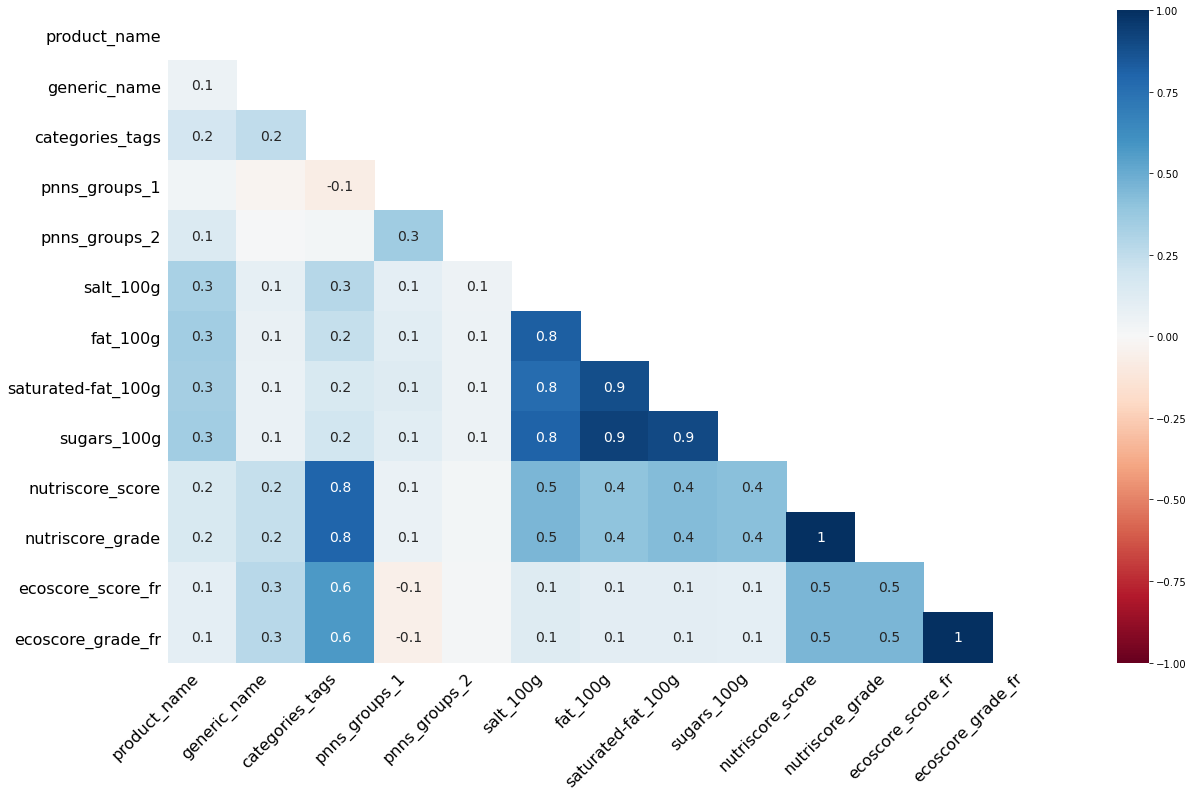

In [203]:
msno.heatmap(df[['product_name',
    'generic_name',
    'categories_tags',
     'pnns_groups_1',
     'pnns_groups_2',
    'salt_100g',
    'fat_100g',
    'saturated-fat_100g',
    'sugars_100g',
    'nutriscore_score',
    'nutriscore_grade',
    'ecoscore_score_fr',
    'ecoscore_grade_fr'
   ]].sample(1000))

<AxesSubplot:>

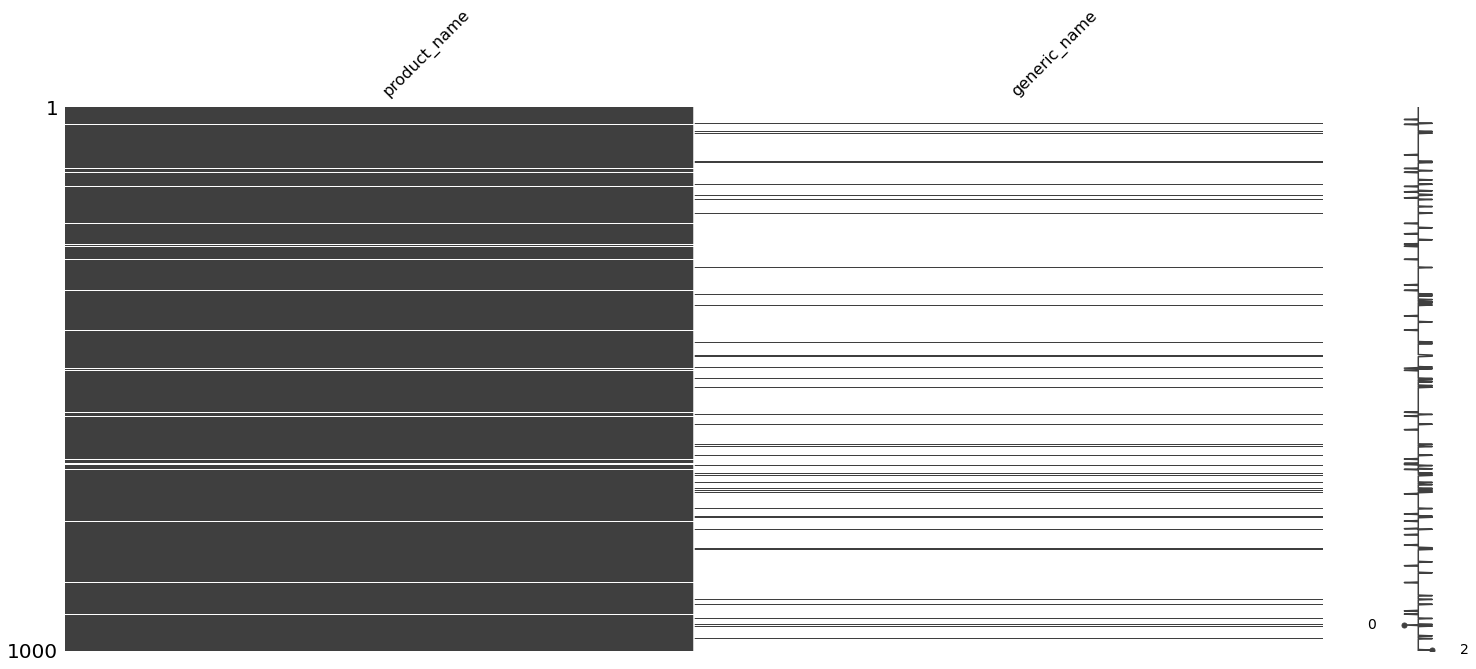

In [204]:
msno.matrix(df[['product_name', 'generic_name']].sample(1000))

In [205]:
df.dropna(subset=['product_name', 'generic_name'], how='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835096,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835097,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835098,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
d = df.loc[df.generic_name.notna()]
d.loc[d.product_name.isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
276672,0200030115662,http://world-en.openfoodfacts.org/product/0200...,kiliweb,1541894643,2018-11-11T00:04:03Z,1581540998,2020-02-12T20:56:38Z,NaN,NaN,Chocolat au lait 28% de cacao,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326661,0390526004003,http://world-en.openfoodfacts.org/product/0390...,agamitsudo,1398250595,2014-04-23T10:56:35Z,1568044377,2019-09-09T15:52:57Z,NaN,NaN,Carrés feuilletés,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480245,12000810,http://world-en.openfoodfacts.org/product/1200...,openfoodfacts-contributors,1617282923,2021-04-01T13:15:23Z,1617393845,2021-04-02T20:04:05Z,NaN,NaN,Kalorienarmes koffeinhaltiges Erfrischungsgetränk,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481838,12772035,http://world-en.openfoodfacts.org/product/1277...,cjk,1601028226,2020-09-25T10:03:46Z,1601063426,2020-09-25T19:50:26Z,NaN,NaN,"Wrong barcode scanned, see 4388844163362",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491349,2000000038095,http://world-en.openfoodfacts.org/product/2000...,bleakpatch,1478519058,2016-11-07T11:44:18Z,1478519979,2016-11-07T11:59:39Z,NaN,NaN,Бананы,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777305,87179095,http://world-en.openfoodfacts.org/product/8717...,kiliweb,1543925434,2018-12-04T12:10:34Z,1616495035,2021-03-23T10:23:55Z,NaN,NaN,"cereal balls with 20% whole grain oat flakes, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815957,9186130057938,http://world-en.openfoodfacts.org/product/9186...,openfoodfacts-contributors,1474118815,2016-09-17T13:26:55Z,1619345408,2021-04-25T10:10:08Z,NaN,NaN,Assortiment de biscuits,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823929,9326451765161,http://world-en.openfoodfacts.org/product/9326...,foodorigins,1465468578,2016-06-09T10:36:18Z,1565969294,2019-08-16T15:28:14Z,NaN,NaN,Champagne ham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828616,9415767035355,http://world-en.openfoodfacts.org/product/9415...,marilyn,1562257079,2019-07-04T16:17:59Z,1562257229,2019-07-04T16:20:29Z,NaN,NaN,Jus d'orange,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Le nombre de lignes pour lesquelles generic_name est renseigné mais product_name est manquant est très réduit en comparaison du nombre de lignes du dataset. On peut éliminer les lignes pour lesquelles product_name n'est pas renseigné, car dans la grande majorité des cas generic_name n'est alors pas renseigné non plus, et il est alors impossible de savoir de quel produit il s'agit.**

Récapitulons:
1. On supprime tous ls produits pour lesquels product_name n'est pas renseigné
2. On ne garde que les lignes pour lesquelles countries_tags==en:france
3. On ne garde que les colonnes ci-dessous
4. ~~Ajout des colonnes ingredients_text et de toutes les colonnes resneignant sur le contenu nutritionnel?~~ Ajout des colonnes suivantes:
- energy-kj_100g
- energy-kcal_100g
- energy_100g
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g

5. On ne garde que les catégories suivantes:
- 'One-dish meals',
- 'Fruits',
- 'Milk and yogurt'
- 'fruits'

In [217]:
df1 = df[['product_name',
          'categories_tags',
            'pnns_groups_2',
          'energy-kj_100g',
          'energy-kcal_100g',
          'energy_100g',
          'fat_100g',
          'saturated-fat_100g',
          'carbohydrates_100g',
          'sugars_100g',
          'salt_100g',
          'nutriscore_score',
          'nutriscore_grade',
          'ecoscore_score_fr',
          'ecoscore_grade_fr',
          'countries_tags']]

In [218]:
df1.dropna(subset=['product_name'])

,product_name,categories_tags,pnns_groups_2,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr,countries_tags
0,jeunes pousses,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
1,Vitória crackers,NaN,unknown,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,1.40,NaN,NaN,NaN,NaN,en:france
2,Cacao,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
3,Filetes de pollo empanado,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:spain
4,Hamburguesas de ternera 100%,NaN,unknown,NaN,874.9,3661.0,15.1,6.10,2.6,1.0,2.10,NaN,NaN,NaN,NaN,en:spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,Sandwich club Rillette poisson combava,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:reunion
1835096,Thé noir BIO Darjeeling,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
1835097,Fati,NaN,unknown,NaN,24.0,100.0,0.3,0.00,2.4,0.6,0.64,NaN,NaN,NaN,NaN,en:belgium
1835098,Light & Free SKYR A BOIRE,NaN,unknown,NaN,0.0,0.0,0.2,0.10,8.0,7.8,0.15,NaN,NaN,NaN,NaN,en:france


In [219]:
df1 = df1.loc[df1.countries_tags=='en:france']

In [221]:
df1

,product_name,categories_tags,pnns_groups_2,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr,countries_tags
0,jeunes pousses,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
1,Vitória crackers,NaN,unknown,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,1.40,NaN,NaN,NaN,NaN,en:france
2,Cacao,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
5,moutarde au moût de raisin,"en:groceries,en:condiments,en:sauces,en:mustards",Dressings and sauces,936.0,NaN,936.0,8.2,2.20,29.0,22.0,4.60,18.0,d,60.0,b,en:france
6,Sfiudwx,fr:xsf,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835089,Minis beignets,"en:snacks,en:sweet-snacks,en:sweet-fritters",unknown,NaN,333.0,1393.0,20.2,6.00,30.9,10.4,1.10,15.0,d,NaN,NaN,en:france
1835092,Steak haché pur boeuf,"en:meats,en:beef,en:steaks,en:beef-steaks,en:g...",Meat,NaN,131.0,548.0,5.0,2.30,0.0,0.0,0.18,-2.0,a,-12.0,e,en:france
1835096,Thé noir BIO Darjeeling,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
1835098,Light & Free SKYR A BOIRE,NaN,unknown,NaN,0.0,0.0,0.2,0.10,8.0,7.8,0.15,NaN,NaN,NaN,NaN,en:france


**On va remplacer les pnns_groups 'unknown' par des NaN de façon à pouvoir les filtrer**

In [224]:
df1['pnns_groups_2'] = df1['pnns_groups_2'].apply(lambda x: np.nan if x=='unknown' else x)
df1.dropna(subset=['categories_tags', 'pnns_groups_2'], how='all')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_name,categories_tags,pnns_groups_2,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr,countries_tags
5,moutarde au moût de raisin,"en:groceries,en:condiments,en:sauces,en:mustards",Dressings and sauces,936.0,NaN,936.0,8.2,2.2,29.0,22.0,4.60,18.0,d,60.0,b,en:france
6,Sfiudwx,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france
15,Pate d'amende,fr:pate-d-amende,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,en:france
16,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",One-dish meals,NaN,32.0,134.0,0.3,0.1,5.3,3.9,0.42,1.0,b,83.0,b,en:france
25,Tarte noix de coco,"en:pies,en:sweet-pies,en:coconut-pies",Biscuits and cakes,NaN,381.0,1594.0,22.0,15.5,27.3,21.9,0.10,14.0,d,NaN,NaN,en:france
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835085,Pain d’epices,"en:biscuits-and-cakes,en:gingerbreads",Biscuits and cakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,b,en:france
1835086,Steak haché,"en:meats,en:beef,en:steaks,en:beef-steaks,en:g...",Meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.0,e,en:france
1835089,Minis beignets,"en:snacks,en:sweet-snacks,en:sweet-fritters",NaN,NaN,333.0,1393.0,20.2,6.0,30.9,10.4,1.10,15.0,d,NaN,NaN,en:france
1835092,Steak haché pur boeuf,"en:meats,en:beef,en:steaks,en:beef-steaks,en:g...",Meat,NaN,131.0,548.0,5.0,2.3,0.0,0.0,0.18,-2.0,a,-12.0,e,en:france


In [225]:
selected_groups = ['One-dish meals',
                   'Fruits',
                   'Milk and yogurt',
                   'fruits',
                   ]
df1 = df1[df1.pnns_groups_2.isin(selected_groups)]

In [226]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36477 entries, 16 to 1834997
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        36373 non-null  object 
 1   categories_tags     36477 non-null  object 
 2   pnns_groups_2       36477 non-null  object 
 3   energy-kj_100g      9217 non-null   float64
 4   energy-kcal_100g    28591 non-null  float64
 5   energy_100g         32517 non-null  float64
 6   fat_100g            32345 non-null  float64
 7   saturated-fat_100g  32271 non-null  float64
 8   carbohydrates_100g  32345 non-null  float64
 9   sugars_100g         32330 non-null  float64
 10  salt_100g           32052 non-null  float64
 11  nutriscore_score    30822 non-null  float64
 12  nutriscore_grade    30822 non-null  object 
 13  ecoscore_score_fr   24795 non-null  float64
 14  ecoscore_grade_fr   24795 non-null  object 
 15  countries_tags      36477 non-null  object 
dtypes

In [101]:
df1.head()

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr
16,Salade de carottes râpées,NaN,"en:meals,en:prepared-vegetables,en:grated-carr...",Composite foods,One-dish meals,0.42,0.3,0.1,3.9,1.0,b,83.0,b
35,Compote de poire,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",Fruits and vegetables,Fruits,0.00,0.0,0.0,27.0,-2.0,a,81.0,b
37,Aiguillettes de poulet,NaN,"en:meats,en:poultries,en:chickens,fr:aiguillet...",Fish Meat Eggs,Meat,NaN,NaN,NaN,NaN,NaN,NaN,29.0,d
39,Salade de macedoine de légumes,NaN,"en:meals,en:prepared-vegetables,en:starters,en...",Composite foods,One-dish meals,0.27,12.7,1.0,1.0,1.0,b,NaN,NaN
66,cuisse de poulet direct au four curry,NaN,"en:meats,en:poultries,en:chickens,en:chicken-t...",Fish Meat Eggs,Meat,1.10,13.0,4.0,0.9,4.0,c,29.0,d


<AxesSubplot:>

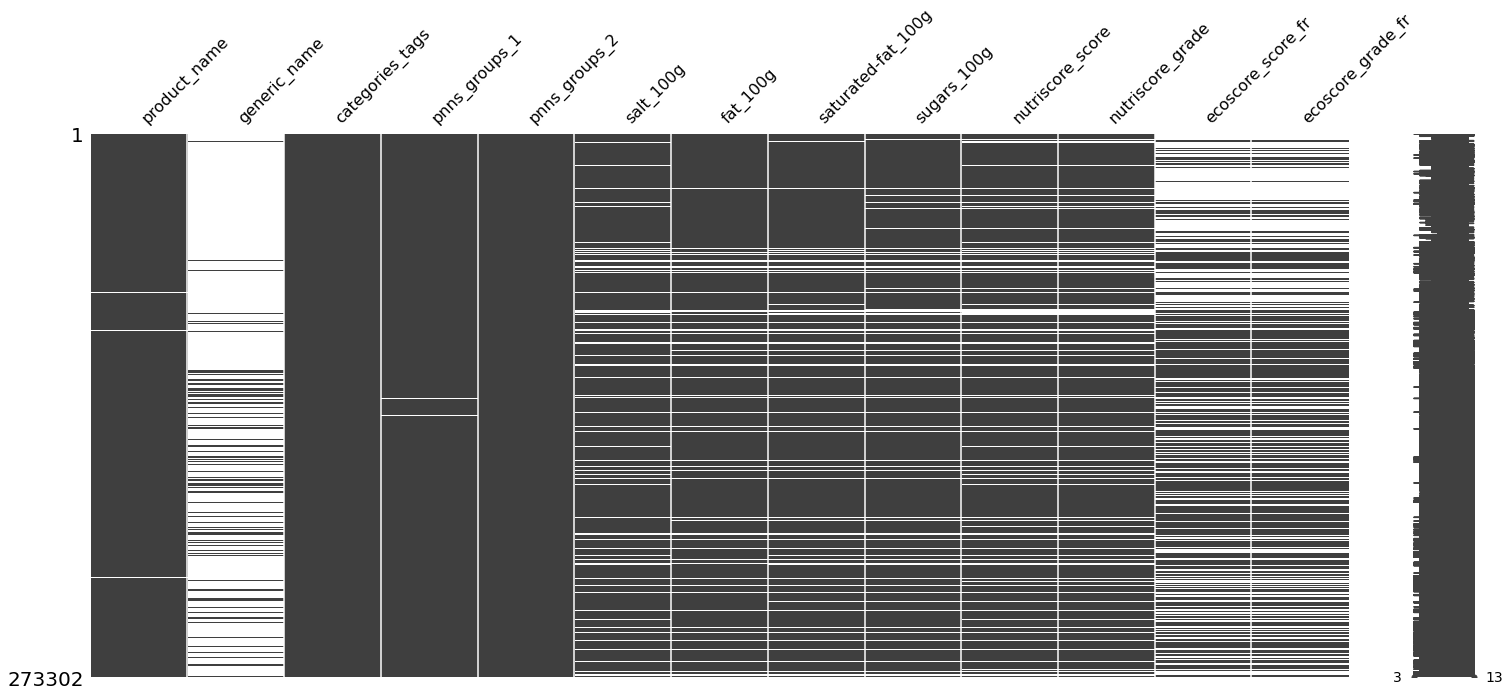

In [103]:
import missingno as msno

msno.matrix(df1)

**Certaines lignes ne contiennent ni product_name ni generic_name! Ces lignes peuvent être supprimées, elles sont inutilisables**

<AxesSubplot:>

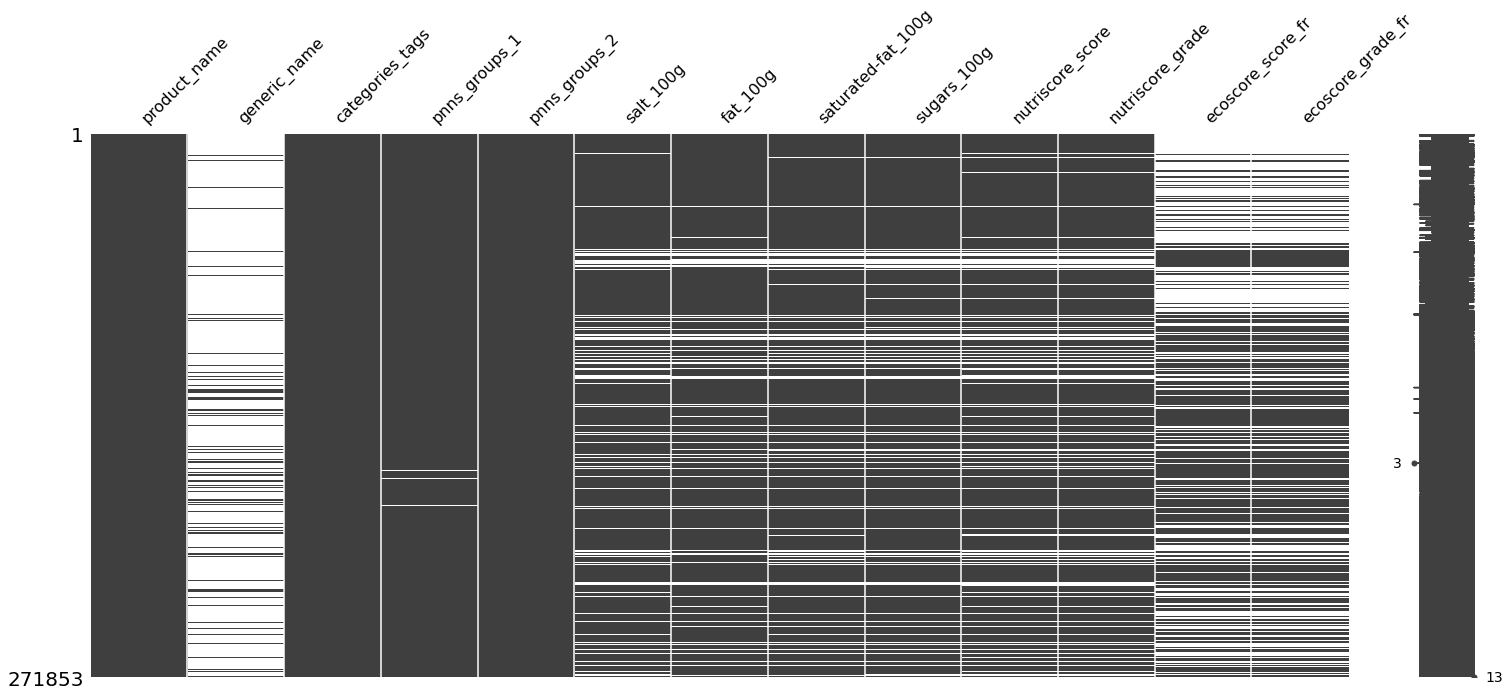

In [104]:
df1 = df1.dropna(subset=['product_name', 'generic_name'], how='all')
msno.matrix(df1)

**Taux de remplissage pour chaque colonne?**

In [105]:
df1.notna().sum()/df1.shape[0]

product_name          0.999893
generic_name          0.144067
categories_tags       1.000000
pnns_groups_1         0.997642
pnns_groups_2         1.000000
salt_100g             0.886564
fat_100g              0.898703
saturated-fat_100g    0.885898
sugars_100g           0.885067
nutriscore_score      0.852726
nutriscore_grade      0.852726
ecoscore_score_fr     0.548605
ecoscore_grade_fr     0.548605
dtype: float64

**Voyons ce qu'on peut faire avec ces colonnes**

In [110]:
gb = df1.groupby("pnns_groups_2")

<AxesSubplot:>

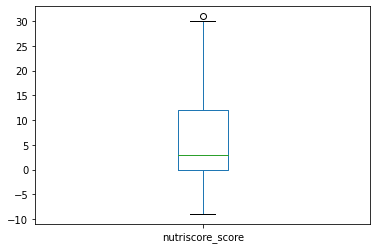

In [111]:
gb.get_group("Meat")["nutriscore_score"].plot(kind="box")

<AxesSubplot:>

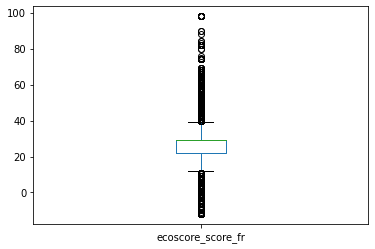

In [112]:
gb.get_group("Meat")["ecoscore_score_fr"].plot(kind="box")

In [109]:
gb.describe()

salt_100g                                               \
                           count      mean        std   min      25%      50%   
pnns_groups_2                                                                   
Cereals                  34946.0  0.698514  15.928207  0.00  0.00000  0.04200   
Fish and seafood         23612.0  1.909157  18.374637  0.00  0.76000  1.11750   
Fruits                   11774.0  0.256759  15.189707  0.00  0.00000  0.01000   
Legumes                   7711.0  0.822608  11.704668  0.00  0.04000  0.50000   
Meat                     22500.0  1.713844  46.019073  0.00  0.18000  1.00076   
Milk and yogurt          29096.0  0.382113   7.304774  0.00  0.10000  0.11750   
One-dish meals           39275.0  1.514803  14.476514  0.00  0.69000  0.90000   
Pizza pies and quiche     7088.0  1.587664  18.796976  0.00  0.99000  1.20000   
Pizza pies and quiches     601.0  1.102759   0.503282  0.00  0.85090  1.04000   
Potatoes                  2405.0  1.147364  14.799876  0.00  0.10000  0.60000   
Processed meat           34187.0  2.754009   3.695698  0.00  1.80000  2.10000   
Soups                     2540.0  0.918443   1.960646  0.00  0.57000  0.68000   
Vegetables               18588.0  0.846228   2.588963  0.00  0.25000  0.60000   
cereals                     31.0  0.274767   0.396624  0.00  0.00000  0.01000   
fruits                     276.0  0.081754   0.612428  0.00  0.00000  0.01000   
legumes                     20.0  0.499560   1.020734  0.01  0.02405  0.06040   
vegetables                6365.0  0.299388   1.088183  0.00  0.02000  0.06500   

                                        fat_100g             ...  \
                           75%      max    count       mean  ...   
pnns_groups_2                                                ...   
Cereals                 0.8125  2500.00  36450.0   6.800407  ...   
Fish and seafood        1.9300  2489.20  23782.0   9.482178  ...   
Fruits                  0.0225  1640.00  12116.0   0.951501  ...   
Legumes                 0.8000   812.00   7943.0   8.240669  ...   
Meat                    1.6000  6532.50  22422.0   9.490599  ...   
Milk and yogurt         0.1400   700.00  29685.0   4.643690  ...   
One-dish meals          1.3000  2100.00  39422.0   7.097940  ...   
Pizza pies and quiche   1.4275  1200.00   7101.0  10.516689  ...   
Pizza pies and quiches  1.3000     9.96    605.0  14.115512  ...   
Potatoes                1.1000   675.00   2432.0   3.609107  ...   
Processed meat          3.6000   594.00  34191.0  18.240238  ...   
Soups                   0.7800    54.80   2547.0   2.273977  ...   
Vegetables              0.8725   164.00  18853.0   1.857643  ...   
cereals                 0.4750     1.47     34.0   1.542301  ...   
fruits                  0.0125     7.25    283.0   0.996922  ...   
legumes                 0.6300     4.50     20.0   2.370000  ...   
vegetables              0.4000    47.50   6429.0   1.305081  ...   

                       nutriscore_score       ecoscore_score_fr             \
                                    75%   max             count       mean   
pnns_groups_2                                                                
Cereals                             7.0  34.0           14494.0  66.049538   
Fish and seafood                   12.0  30.0           17639.0  25.399739   
Fruits                             -1.0  29.0            9395.0  75.819478   
Legumes                             1.0  30.0            6946.0  71.821048   
Meat                               12.0  31.0           18866.0  25.119898   
Milk and yogurt                     4.0  34.0           19705.0  52.759655   
One-dish meals                      7.0  32.0           16126.0  47.142255   
Pizza pies and quiche              13.0  32.0            2505.0  49.193613   
Pizza pies and quiches             15.0  22.0             409.0  48.481663   
Potatoes                            4.0  26.0            2661.0  84.234874   
Processed meat             

In [113]:
gb_meat = gb.get_group('Meat')
gb_seafood = gb.get_group('Fish and seafood')
gb_fruits = gb.get_group('Fruits')
gb_legumes = gb.get_group("Legumes")
gb_cereals = gb.get_group("Cereals")
gb_pizza = gb.get_group("Pizza pies and quiche")

In [114]:
# Réalise un tirage aléatoire de 5 fruits et légumes
fruits = gb_fruits['product_name'].sample(3)
veggies = gb_legumes['product_name'].sample(2)

print(fruits, veggies)

14744                                            Applesauce
297173                                          Bananes bio
91710     Shoprite, halved unpeeled apricots in heavy syrup
Name: product_name, dtype: object 64998           Skippy Creamy
1818473    Australian Peanuts
Name: product_name, dtype: object


**Il va falloir trouver une manière de filtrer les "vrais" fruits/légumes des "faux"... peut-être à l'aide des categories_tags?**

**On peut regarder les categories_tags associés à chaque produit**

In [118]:
# Réalise un tirage aléatoire de 5 fruits et légumes
fruits = gb_fruits[['product_name', 'categories_tags']].sample(3)
veggies = gb_legumes[['product_name', 'categories_tags']].sample(3)

In [125]:
# On récupère les tags uniques associés aux trois fruits
import itertools

tags = []
for ct in fruits.categories_tags:
    tags.append(ct.split(','))

In [128]:
for i, pn in enumerate(fruits.product_name):
    print(pn, tags[i])

Peaches In Light Syrup, Fruit Cup Snacks ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:canned-foods', 'en:fruits-and-vegetables-based-foods', 'en:canned-plant-based-foods', 'en:fruits-based-foods', 'en:canned-fruits']
POMME Pomme Gala cat 1 ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:fruits-and-vegetables-based-foods', 'en:fruits-based-foods', 'en:fruits', 'en:apples', 'en:sweet-apples', 'en:gala-apples', 'fr:calibre-95-130', 'fr:categorie-i']
Pear halves bartlet pears in heavy syrup ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:canned-foods', 'en:fruits-and-vegetables-based-foods', 'en:canned-plant-based-foods', 'en:fruits-based-foods', 'en:canned-fruits']


In [132]:
veg_tags = []
for ct in veggies.categories_tags:
    veg_tags.append(ct.split(','))
for i, pn in enumerate(veggies.product_name):
    print(pn, veg_tags[i])
    print('')

Beurre de Cacahuètes Crémeux ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:legumes-and-their-products', 'en:spreads', 'en:nuts-and-their-products', 'en:plant-based-spreads', 'en:oilseed-purees', 'en:legume-butters', 'en:nut-butters', 'en:peanut-butters', 'fr:beurres-de-cacahuetes-cremeux']

Haricots lingots ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:legumes-and-their-products', 'en:legumes', 'en:seeds', 'en:legume-seeds', 'en:pulses', 'en:common-beans']

Haricot rouge ['en:plant-based-foods-and-beverages', 'en:plant-based-foods', 'en:legumes-and-their-products', 'en:legumes', 'en:seeds', 'en:legume-seeds', 'en:pulses', 'en:common-beans', 'en:red-beans']



In [131]:
veggies

,product_name,categories_tags
1225988,Beurre de Cacahuètes Crémeux,"en:plant-based-foods-and-beverages,en:plant-ba..."
992246,Haricots lingots,"en:plant-based-foods-and-beverages,en:plant-ba..."
671372,Haricot rouge,"en:plant-based-foods-and-beverages,en:plant-ba..."


In [71]:
gb.get_group("Vegetables")

,product_name,generic_name,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g,nutriscore_score,nutriscore_grade
185,Organic Baby Lima Beans,NaN,Fruits and vegetables,Vegetables,0.02794,NaN,NaN,8.89,NaN,NaN
337,Salade Cesar,Laitue en salade,Fruits and vegetables,Vegetables,2.16000,12.0,7.0,0.00,6.0,c
729,Cauliflower,Cauliflower,Fruits and vegetables,Vegetables,0.00000,0.9,NaN,2.50,NaN,NaN
818,Spring Onions,NaN,Fruits and vegetables,Vegetables,NaN,NaN,NaN,NaN,NaN,NaN
896,Confit d'Oignons ou de figues,NaN,Fruits and vegetables,Vegetables,0.10000,0.5,0.1,42.00,6.0,c
...,...,...,...,...,...,...,...,...,...,...
1834376,Confit d'oignons,NaN,Fruits and vegetables,Vegetables,NaN,NaN,NaN,NaN,NaN,NaN
1834466,Ceba Caramel•litzada,NaN,Fruits and vegetables,Vegetables,0.54000,0.5,0.1,60.00,14.0,d
1834516,Poireaux,NaN,Fruits and vegetables,Vegetables,NaN,NaN,NaN,NaN,NaN,NaN
1834803,Asperges blanches,NaN,Fruits and vegetables,Vegetables,1.00000,0.0,0.0,1.20,-2.0,a


In [73]:
gb.get_group("Legumes")

,product_name,generic_name,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g,nutriscore_score,nutriscore_grade
406,lentilles vertes,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN
1542,Pois chiche,NaN,Cereals and potatoes,Legumes,0.80,1.10,0.10,4.80,-2.0,a
1687,VEGAN PEA PROTEIN ISOLAT,NaN,Cereals and potatoes,Legumes,NaN,NaN,NaN,NaN,NaN,NaN
1734,Peanut Butter,NaN,Cereals and potatoes,Legumes,0.00,48.00,7.50,3.00,-1.0,a
1736,Peanut Butter,NaN,Cereals and potatoes,Legumes,0.00,50.00,7.81,3.12,-1.0,a
...,...,...,...,...,...,...,...,...,...,...
1833328,Nipurk,NaN,Cereals and potatoes,Legumes,NaN,49.00,0.00,0.00,NaN,NaN
1833899,Alubias blancas,NaN,Cereals and potatoes,Legumes,0.70,1.20,0.20,0.30,5.0,c
1834180,Lentilles,NaN,Cereals and potatoes,Legumes,0.58,0.50,0.10,0.50,0.0,b
1834377,Pois chiches noirs,NaN,Cereals and potatoes,Legumes,0.08,5.85,0.55,6.50,0.0,b


**Le beurre de cacahuète (et le Nipurk qui en est également un) contient beaucoup de gras. On peut essayer de filtrer en utilisant la quantité de graisse**

In [83]:
gb_legumes.shape

(8724, 10)

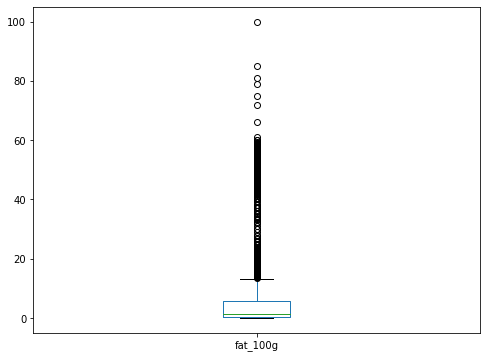

In [84]:
plt.figure(figsize=(8, 6))
gb_legumes.fat_100g.plot(kind='box')
plt.show()

**Récupérons les outliers: les produits du df gb_legumes dont la quantité de graisse est élevée**

In [92]:
gb_legumes.loc[gb_legumes.fat_100g > 10, "product_name"]

1734                              Peanut Butter
1736                              Peanut Butter
2004                  Pois chiche a l'orientale
3300                              Peanut Butter
7705                      Crunchy Peanut Butter
                           ...                 
1829679                     Beurre de cacahuète
1829683        Super Crunchy Peanut Butter 360G
1833190    Cremuta - Crema de cacahuete natural
1833328                                  Nipurk
1834718                     Beurre de cacahuète
Name: product_name, Length: 1317, dtype: object

**Ca semble marcher!**

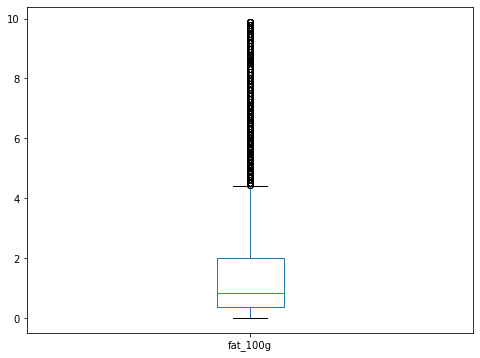

In [90]:
gb_legumes_nofat = gb_legumes.loc[gb_legumes.fat_100g < 10]
plt.figure(figsize=(8,6))
gb_legumes_nofat.fat_100g.plot(kind="box")
plt.show()

In [93]:
gb_legumes_nofat.sample(10)

,product_name,generic_name,pnns_groups_1,pnns_groups_2,salt_100g,fat_100g,saturated-fat_100g,sugars_100g,nutriscore_score,nutriscore_grade
1669190,NaN,NaN,Cereals and potatoes,Legumes,0.9000,2.00,0.20,0.70,1.0,b
53119,Proteita texturizada de soja,NaN,Cereals and potatoes,Legumes,0.2600,1.50,0.10,8.10,1.0,b
1026331,Lentilles blondes,NaN,Cereals and potatoes,Legumes,0.0900,1.80,0.30,2.10,-6.0,a
1592831,Garbanzo pedrosillano,Garbanzos de tipo Pedrosillano,Cereals and potatoes,Legumes,0.4191,3.95,0.38,8.60,-4.0,a
69663,"Allens, chili beans in sauce",NaN,Cereals and potatoes,Legumes,0.8525,0.39,0.00,0.78,-3.0,a
978710,Pois chiches Bio Sachet biocompostable,NaN,Cereals and potatoes,Legumes,0.0800,4.90,0.60,1.60,-1.0,a
856851,Flageolets,NaN,Cereals and potatoes,Legumes,0.4000,0.90,0.10,0.40,0.0,b
322794,Vegetarian baked beans,NaN,Cereals and potatoes,Legumes,0.7600,0.77,0.15,6.92,-1.0,a
420708,Organic black beans,NaN,Cereals and potatoes,Legumes,0.2500,0.00,0.00,0.77,-5.0,a
9554,Spicy Black Beans,NaN,Cereals and potatoes,Legumes,0.5775,0.77,0.00,0.77,-4.0,a


**Trop complexe de réaliser une suggestion de 5 fruits et legumes en plus du reste et d'avoir les bons apports + nutriscore? Ou besoin de plus de colonnes pour arriver à affiner la sélection?**

In [76]:
gb2 = df1.groupby(["pnns_groups_1", "pnns_groups_2"])

In [78]:
for name, group in gb2:
    print(name)
    print(group)

('Cereals and potatoes', 'Cereals')
                                 product_name  \
499      Pâtes à l'épeautre - Rêve de Neptune   
665                           Pâte feuilletée   
742                       Petit hoppelli noir   
830                       Seitán a la plancha   
913                                       NaN   
...                                       ...   
1834885                    Graine de lin brun   
1834951           Pate feuilletée sans gluten   
1835021                           cup noodles   
1835052                 Huile de cameline bio   
1835084                           Riz parfumé   

                                              generic_name  \
499                                                    NaN   
665                                                    NaN   
742                                                    NaN   
830                                                    NaN   
913                                                    NaN   
...

                       product_name                 generic_name  \
1478       Bio Reishi Pilz gemahlen                          NaN   
1931           Large flat mushrooms                          NaN   
2614            Diced green peppers                          NaN   
5801       Organic Broccoli Florets                          NaN   
6027                  Broccoli cuts                          NaN   
...                             ...                          ...   
1828812      White button mushrooms                          NaN   
1830018  Champignons de Paris Blanc                          NaN   
1830652                     Tempura                          NaN   
1831457  Champignons parfumés Ayam™  Champignons Shiitaké séchés   
1831458           Champignons Noirs     Champignons Noirs Séchés   

                 pnns_groups_1 pnns_groups_2  salt_100g  fat_100g  \
1478     fruits-and-vegetables    vegetables        NaN       NaN   
1931     fruits-and-vegetables    vegetables 

In [79]:
for name, _ in gb2:
    print(name)

('Cereals and potatoes', 'Cereals')
('Cereals and potatoes', 'Legumes')
('Cereals and potatoes', 'Potatoes')
('Composite foods', 'One-dish meals')
('Composite foods', 'Pizza pies and quiche')
('Fish Meat Eggs', 'Fish and seafood')
('Fish Meat Eggs', 'Meat')
('Fish Meat Eggs', 'Processed meat')
('Fruits and vegetables', 'Fruits')
('Fruits and vegetables', 'Soups')
('Fruits and vegetables', 'Vegetables')
('Milk and dairy products', 'Milk and yogurt')
('cereals-and-potatoes', 'cereals')
('cereals-and-potatoes', 'legumes')
('fruits-and-vegetables', 'fruits')
('fruits-and-vegetables', 'vegetables')


**Deux axes:**
- sélectionner les produits en français uniquement
- permettre une sélection des suggestions plus fine

In [22]:
def select_tag(s):
    tag = s.split(',')[0]
    return tag

**On définit un nouveau dataframe contenant seulement les colonnes relatives au nom, à la (aux) catégorie(s), au nutriscore, et à l'ecoscore.**

In [109]:
df_eco = df[['generic_name',
             'categories_tags',
             'nutriscore_score',
             'nutriscore_grade',
             'ecoscore_score_fr',
   ]].dropna()

In [110]:
df_eco.head()

,generic_name,categories_tags,nutriscore_score,nutriscore_grade,ecoscore_score_fr
334,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",0.0,b,53.0
375,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",9.0,c,60.0
399,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",23.0,e,64.0
420,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",2.0,b,30.0
426,Bonbons acidulés Raisin Fraise,"en:snacks,en:sweet-snacks,en:confectioneries,e...",14.0,d,28.0


**Définissons une nouvelle colonne qui va ne contenir que le premier tag.**

In [111]:
df_eco['first_tag'] = df_eco['categories_tags'].dropna().apply(select_tag)
df_eco.head()

,generic_name,categories_tags,nutriscore_score,nutriscore_grade,ecoscore_score_fr,first_tag
334,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",0.0,b,53.0,en:meals
375,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",9.0,c,60.0,en:snacks
399,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",23.0,e,64.0,en:groceries
420,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",2.0,b,30.0,en:meals
426,Bonbons acidulés Raisin Fraise,"en:snacks,en:sweet-snacks,en:confectioneries,e...",14.0,d,28.0,en:snacks


**Regardons comment la catégorie d'aliment est corrélée avec son nutriscore**

**Quels sont les tags présents?**

In [112]:
df_eco.first_tag.unique()

array(['en:meals', 'en:snacks', 'en:groceries', 'en:marzipan', 'en:meats',
       'en:biscuits-and-cakes', 'en:dairies',
       'en:plant-based-foods-and-beverages', 'en:seafood',
       'en:canned-foods', 'en:sweeteners', 'en:spreads', 'en:beverages',
       'en:desserts', 'en:frozen-foods', 'en:sandwiches',
       'en:chips-and-fries', 'en:cocoa-and-its-products', 'en:lettuces',
       'en:farming-products', 'en:pizza-dough', 'en:breakfasts',
       'en:crepes-and-galettes', 'en:cooking-helpers',
       'en:dietary-supplements', 'en:meal-kits',
       'en:fish-and-meat-and-eggs', 'en:fats', 'en:pies',
       'en:fresh-foods', 'en:artisan-products', 'en:food-decorations',
       'en:food-additives'], dtype=object)

**Regardons le nombre d'aliments/plats par tag**

In [27]:
df_eco.first_tag.value_counts()

en:plant-based-foods-and-beverages    20984
en:snacks                             12439
en:dairies                             9605
en:meats                               4442
en:groceries                           2416
en:meals                               2215
en:desserts                            2013
en:seafood                             1452
en:canned-foods                        1305
en:beverages                            834
en:frozen-foods                         757
en:sandwiches                           487
en:farming-products                     333
en:spreads                              332
en:sweeteners                           291
en:biscuits-and-cakes                   231
en:crepes-and-galettes                  190
en:chips-and-fries                      163
en:fish-and-meat-and-eggs               117
en:pies                                  76
en:pizza-dough                           69
en:cocoa-and-its-products                59
en:fats                         

**On va récupérer les tags concernant au moins 1000 aliments différents**

In [50]:
selected_tags = df_eco.first_tag.value_counts() > 1000
selected_tags = selected_tags[selected_tags].index

In [51]:
selected_tags

Index(['en:plant-based-foods-and-beverages', 'en:snacks', 'en:dairies',
       'en:meats', 'en:groceries', 'en:meals', 'en:desserts', 'en:seafood',
       'en:canned-foods'],
      dtype='object')

In [52]:
df_eco[df_eco.first_tag.isin(selected_tags)]

,generic_name,categories_tags,nutriscore_score,nutriscore_grade,ecoscore_score_fr,first_tag
334,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",0.0,b,53.0,en:meals
375,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",9.0,c,60.0,en:snacks
399,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",23.0,e,64.0,en:groceries
420,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",2.0,b,30.0,en:meals
426,Bonbons acidulés Raisin Fraise,"en:snacks,en:sweet-snacks,en:confectioneries,e...",14.0,d,28.0,en:snacks
...,...,...,...,...,...,...
1832534,Gnocchi aux flocons de pommes de terre à poêler,"en:plant-based-foods-and-beverages,en:plant-ba...",4.0,c,82.0,en:plant-based-foods-and-beverages
1832693,Marinara sauce,"en:groceries,en:sauces,en:tomato-sauces",3.0,c,76.0,en:groceries
1834525,Nectar de pommes à base de jus concentré. Tene...,"en:plant-based-foods-and-beverages,en:beverage...",2.0,c,55.0,en:plant-based-foods-and-beverages
1834951,Pâte Feuilletée avec de la matière grasse végé...,"en:plant-based-foods-and-beverages,en:plant-ba...",8.0,c,36.0,en:plant-based-foods-and-beverages


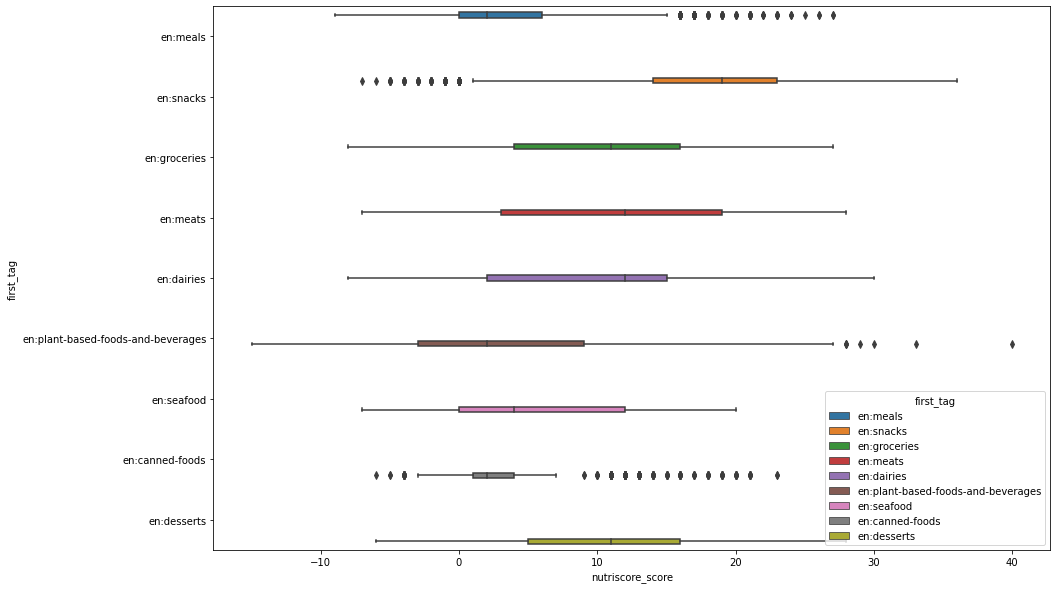

In [59]:
plt.figure(figsize=(15, 10))
ax1 = sns.boxplot(y="first_tag",
                  x="nutriscore_score",
                  orient='h',
                  data=df_eco[df_eco.first_tag.isin(selected_tags)],
                  hue='first_tag')

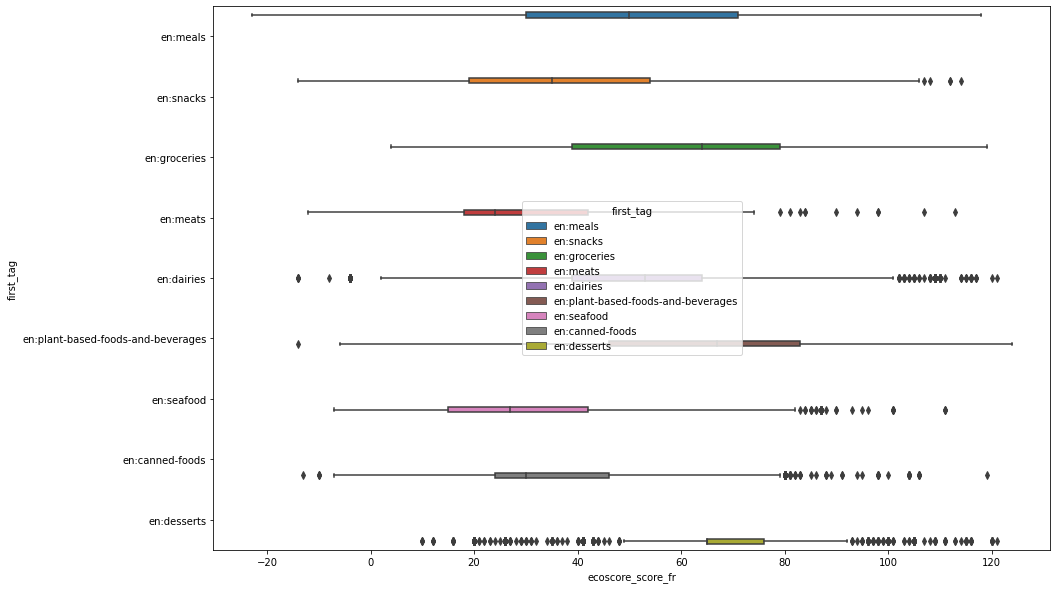

In [60]:
plt.figure(figsize=(15, 10))
ax1 = sns.boxplot(y="first_tag",
                  x="ecoscore_score_fr",
                  orient='h',
                  data=df_eco[df_eco.first_tag.isin(selected_tags)],
                  hue='first_tag')

Les nutriscores et ecoscore de chaque catégorie couvrent un large éventail de valeurs de nutriscore et ecoscore différents. Cela devrait rendre possible de faire des choix, pour une catégorie de produit donnée.

**Regardons spécifiquement quelques catégories: meals, meats, dairies, seafood.**

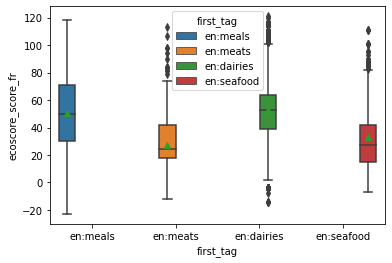

In [63]:
tags = ['en:dairies',
        'en:meats',
        'en:meals',
        'en:seafood'
        ]
ax1 = sns.boxplot(x='first_tag',
                     y="ecoscore_score_fr",
                     data=df_eco[df_eco.first_tag.isin(tags)], hue='first_tag', showmeans=True)

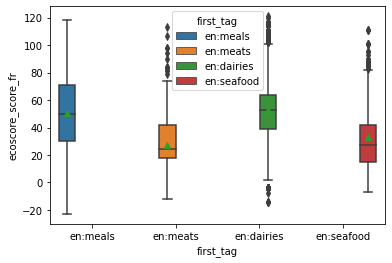

In [63]:
tags = ['en:dairies',
        'en:meats',
        'en:meals',
        'en:seafood'
        ]
ax1 = sns.boxplot(x='first_tag',
                     y="ecoscore_score_fr",
                     data=df_eco[df_eco.first_tag.isin(tags)], hue='first_tag', showmeans=True)

**Que sont les pnns_groups?**

In [69]:
df_pnns = df[['pnns_groups_1', 'pnns_groups_2']].applymap(lambda x: np.nan if x=='unknown' else x).dropna()
df_pnns.pnns_groups_1.unique()

array(['Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'sugary-snacks', 'fruits-and-vegetables', 'cereals-and-potatoes',
       'salty-snacks'], dtype=object)

In [71]:
df_pnns.pnns_groups_2.unique()

array(['Dressings and sauces', 'One-dish meals', 'Biscuits and cakes',
       'Fruits', 'Meat', 'Sweetened beverages', 'Cheese', 'Bread',
       'Fish and seafood', 'Sweets', 'Salty and fatty products',
       'Fruit juices', 'Dried fruits', 'Vegetables', 'Fats',
       'Dairy desserts', 'Milk and yogurt', 'pastries',
       'Pizza pies and quiche', 'Legumes', 'Unsweetened beverages',
       'Nuts', 'Cereals', 'Breakfast cereals', 'Appetizers',
       'Processed meat', 'Chocolate products', 'Eggs',
       'Plant-based milk substitutes', 'vegetables', 'Sandwiches',
       'Ice cream', 'Soups', 'Teas and herbal teas and coffees',
       'Potatoes', 'Artificially sweetened beverages',
       'Waters and flavored waters', 'Offals', 'fruits', 'Fruit nectars',
       'cereals', 'legumes', 'nuts'], dtype=object)

**Peu de catégories différentes! Essayons de voir si on peut en déduire des corrélations avec le nutri-score et l'ecoscore** 